In [ ]:
import os
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import random
from PIL import Image
import scipy.misc
import imageio
import os
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import keras
from tensorflow.keras.utils import normalize
from keras.metrics import MeanIoU

#My personal Drive is mounted here which has all the dataset and models

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
directory='/content/drive/MyDrive/CV_Project/tif/'

In [ ]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


# Define the folder containing the images
current_directory = os.getcwd()
print(os.getcwd())

# Load the .tif file
data = tiff.imread(directory + "volumedata.tif" )

print(f"Data shape: {data.shape}")
print(f"Data type: {data.dtype}")
print(f"Min and max values: {data.min()}, {data.max()}")

# Visualize some slices from the 3D stack
num_slices = data.shape[0]
sample_slices = [num_slices//4, num_slices//2, 3*num_slices//4]  # you can modify these or add more indices

fig, axes = plt.subplots(1, len(sample_slices), figsize=(15,5))
for idx, slice_idx in enumerate(sample_slices):
    axes[idx].imshow(data[slice_idx, ...], cmap='gray')
    axes[idx].set_title(f'Slice {slice_idx}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


/content


KeyboardInterrupt: ignored

Training Data:
Data shape: (165, 768, 1024)
Data type: uint8
Min and max values: 22, 244



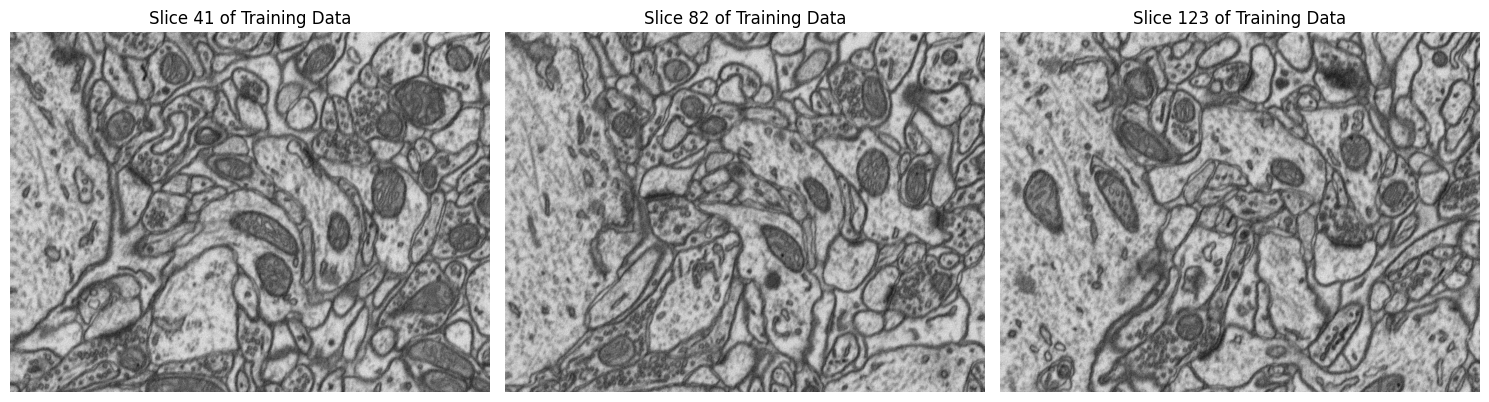

Training Groundtruth:
Data shape: (165, 768, 1024)
Data type: uint8
Min and max values: 0, 255



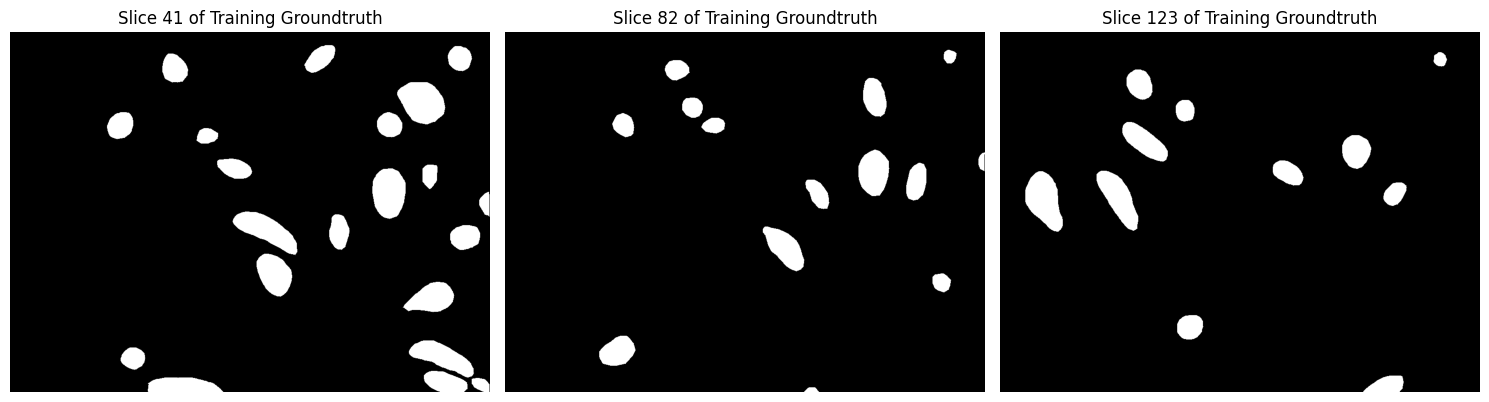

Testing Data:
Data shape: (165, 768, 1024)
Data type: uint8
Min and max values: 2, 255



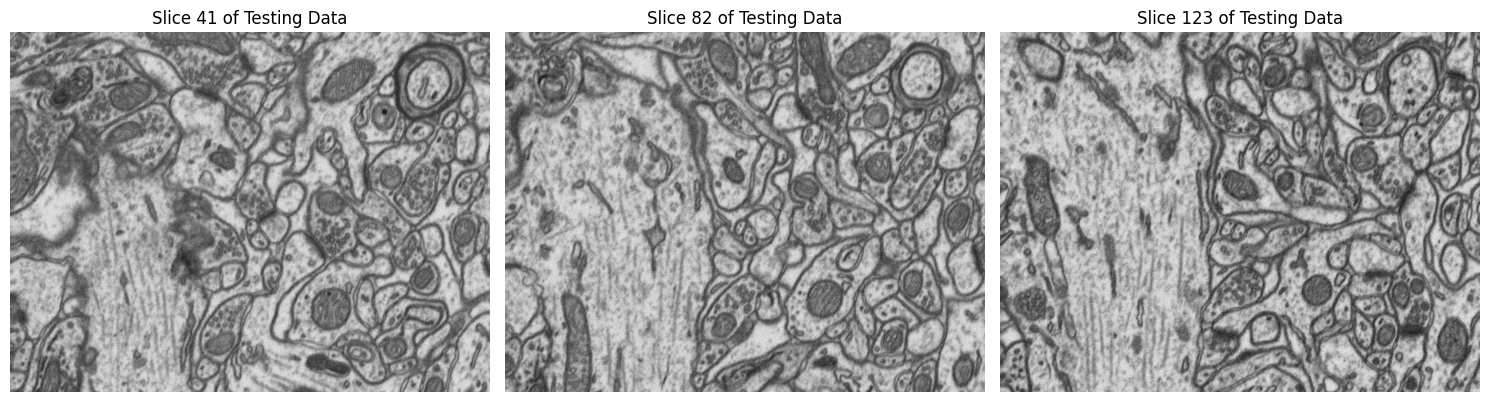

Testing Groundtruth:
Data shape: (165, 768, 1024)
Data type: uint8
Min and max values: 0, 255



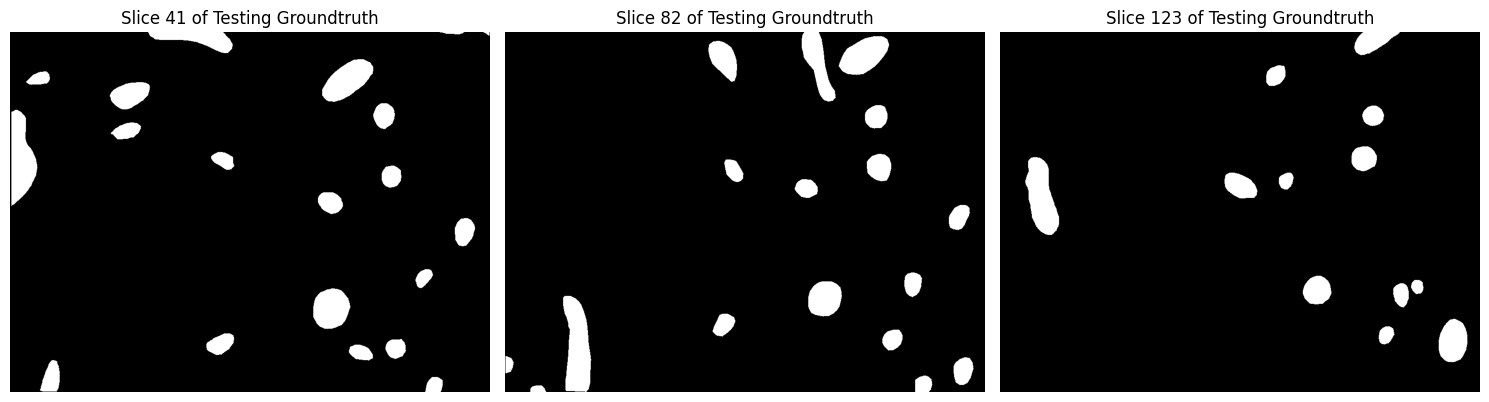

In [ ]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


directory = '/content/drive/MyDrive/CV_Project/tif/' # replace with the path to your directory

# Load the files
train_data = tiff.imread(os.path.join(directory, 'training.tif'))
train_groundtruth = tiff.imread(os.path.join(directory, 'training_groundtruth.tif'))
test_data = tiff.imread(os.path.join(directory, 'testing.tif'))
test_groundtruth = tiff.imread(os.path.join(directory, 'testing_groundtruth.tif'))

datasets = {
    "Training Data": train_data,
    "Training Groundtruth": train_groundtruth,
    "Testing Data": test_data,
    "Testing Groundtruth": test_groundtruth
}

# Exploring and visualizing the datasets
for name, data in datasets.items():
    print(f"{name}:")
    print(f"Data shape: {data.shape}")
    print(f"Data type: {data.dtype}")
    print(f"Min and max values: {data.min()}, {data.max()}\n")

    # Visualize some slices
    num_slices = data.shape[0]
    sample_slices = [num_slices//4, num_slices//2, 3*num_slices//4]

    fig, axes = plt.subplots(1, len(sample_slices), figsize=(15, 5))
    for idx, slice_idx in enumerate(sample_slices):
        axes[idx].imshow(data[slice_idx, ...], cmap='gray')
        axes[idx].set_title(f'Slice {slice_idx} of {name}')
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

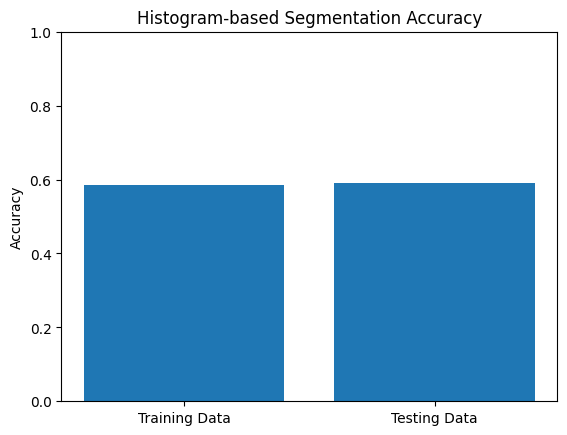

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Step 1: Histogram-based Segmentation using Otsu's thresholding method

def histogram_segmentation(volume):
    # Calculate the threshold for the entire volume
    thresh = threshold_otsu(volume)
    # Apply threshold
    binary = volume < thresh
    return binary

# Segment the training and testing data
train_data_segmented = histogram_segmentation(train_data)
test_data_segmented = histogram_segmentation(test_data)

# Step 2: Compare with Ground Truth

# We'll use a simple accuracy metric for comparison: (TP + TN) / Total
def calculate_accuracy(segmented, ground_truth):
    total = segmented.size
    true_positive = np.sum(segmented & ground_truth)
    true_negative = np.sum(~segmented & ~ground_truth)
    return (true_positive + true_negative) / total

import numpy as np

def calculate_iou(prediction, ground_truth):
    """
    Calculate Intersection over Union (IoU) for binary segmentation.

    Args:
    - prediction (numpy array): Binary mask of the prediction.
    - ground_truth (numpy array): Binary mask of the ground truth.

    Returns:
    - float: IoU score.
    """
    intersection = np.logical_and(prediction, ground_truth)
    union = np.logical_or(prediction, ground_truth)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score


train_accuracy = calculate_accuracy(train_data_segmented, train_groundtruth)
test_accuracy = calculate_accuracy(test_data_segmented, test_groundtruth)

train_iou = calculate_iou(train_data_segmented, train_groundtruth)
test_iou = calculate_iou(test_data_segmented, test_groundtruth)

# Step 3: Accuracy Calculation & Plotting

# Plot the accuracies
labels = ['Training Data', 'Testing Data']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('Histogram-based Segmentation Accuracy')
plt.ylim([0, 1])  # set y-axis limits to [0, 1] for clarity
plt.show()


In [ ]:
print(train_accuracy,test_accuracy)
print(train_iou,test_iou)

0.584291685470427 0.5902718669236309
0.11511911716048587 0.11026126567745013


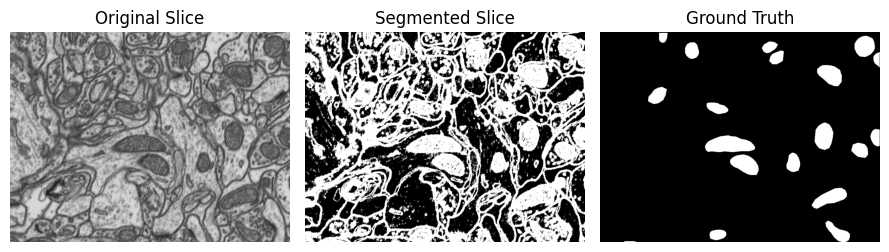

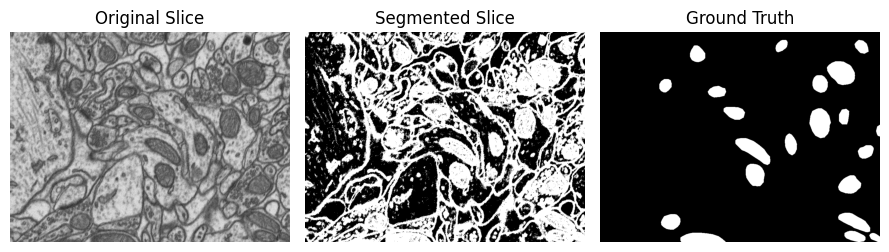

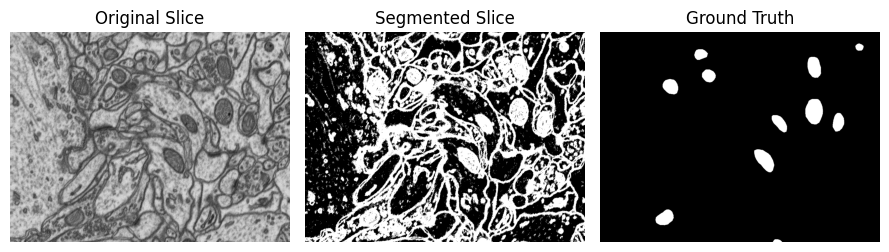

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize a single slice alongside segmented result and ground truth
def compare_slices(slice_index, original_data, segmented_data, ground_truth):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))

    axes[0].imshow(original_data[slice_index, :, :], cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Original Slice')

    axes[1].imshow(segmented_data[slice_index, :, :], cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Segmented Slice')

    axes[2].imshow(ground_truth[slice_index, :, :], cmap='gray')
    axes[2].axis('off')
    axes[2].set_title('Ground Truth')

    plt.tight_layout()
    plt.show()

# Let's pick some slices and visualize them
slice_indices = [10, 50, 90]  # You can change these indices to view other slices

for idx in slice_indices:
    compare_slices(idx, train_data, train_data_segmented, train_groundtruth)


In [ ]:
from skimage.morphology import opening, closing, remove_small_objects, disk

def post_process_segmentation(binary_mask):
    # Initialize an empty array with the same shape as the binary_mask
    cleaned_mask = np.zeros_like(binary_mask)

    for idx in range(binary_mask.shape[0]):  # Assuming the first dimension is the slice dimension
        slice_mask = binary_mask[idx]

        # Morphological operations
        slice_mask = opening(slice_mask, selem=disk(3))
        slice_mask = closing(slice_mask, selem=disk(3))

        # Connected Component Analysis to remove small objects
        slice_mask = remove_small_objects(slice_mask, min_size=500)  # Adjust min_size as per your need

        # Hole filling
        slice_mask = np.logical_not(closing(np.logical_not(slice_mask), selem=disk(3)))

        cleaned_mask[idx] = slice_mask

    return cleaned_mask

# Apply post-processing
train_data_segmented_cleaned = post_process_segmentation(train_data_segmented)
test_data_segmented_cleaned = post_process_segmentation(test_data_segmented)



print(train_data_segmented.shape)

# Now, you can compare the post-processed results with the ground truth as you did earlier
train_accuracy_cleaned = calculate_accuracy(train_data_segmented_cleaned, train_groundtruth)
test_accuracy_cleaned = calculate_accuracy(test_data_segmented_cleaned, test_groundtruth)

# Now, you can compare the post-processed results with the ground truth as you did earlier
train_iou_cleaned = calculate_iou(train_data_segmented_cleaned, train_groundtruth)
test_iou_cleaned = calculate_iou(test_data_segmented_cleaned, test_groundtruth)



/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:274: FutureWarning: `selem` is a deprecated argument name for `opening`. It will be removed in version 1.0. Please use `footprint` instead.
  warnings.warn(self.warning_msg.format(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:274: FutureWarning: `selem` is a deprecated argument name for `closing`. It will be removed in version 1.0. Please use `footprint` instead.
  warnings.warn(self.warning_msg.format(


(165, 768, 1024)


In [ ]:
print(train_accuracy_cleaned,test_accuracy_cleaned)
print(train_iou_cleaned, test_iou_cleaned)

0.6602955750744752 0.6623328623145518
0.13755821760898296 0.13080884407117183


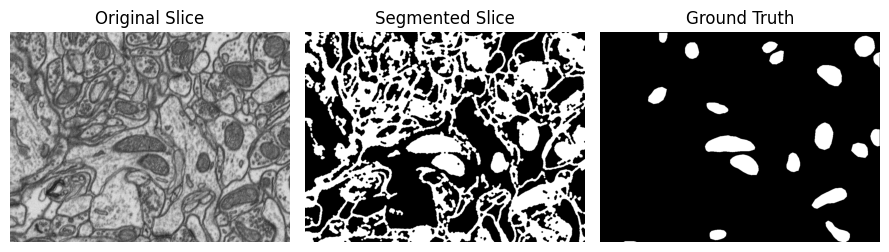

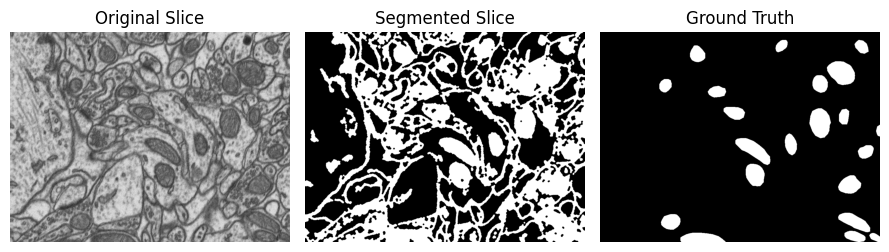

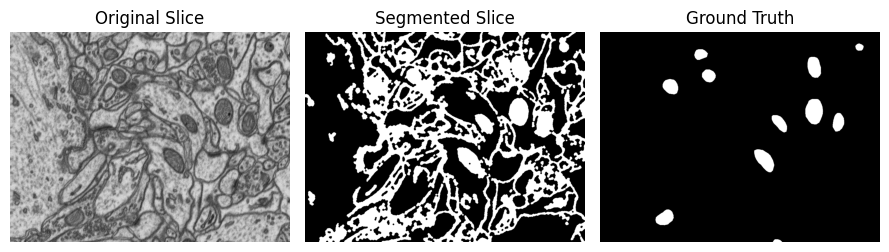

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize a single slice alongside segmented result and ground truth
def compare_slices(slice_index, original_data, segmented_data, ground_truth):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))

    axes[0].imshow(original_data[slice_index, :, :], cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Original Slice')

    axes[1].imshow(segmented_data[slice_index, :, :], cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Segmented Slice')

    axes[2].imshow(ground_truth[slice_index, :, :], cmap='gray')
    axes[2].axis('off')
    axes[2].set_title('Ground Truth')

    plt.tight_layout()
    plt.show()

# Let's pick some slices and visualize them
slice_indices = [10, 50, 90]  # You can change these indices to view other slices

for idx in slice_indices:
    compare_slices(idx, train_data, train_data_segmented_cleaned, train_groundtruth)


In [ ]:
from skimage.morphology import opening, closing, remove_small_objects, skeletonize, label, disk
from skimage.measure import regionprops

## additional/ different post processing where i want to remove thin lines that are being segmented as well, along with bulky cells
def post_process_segmentation2(binary_mask):
    cleaned_mask = np.zeros_like(binary_mask)

    for idx in range(binary_mask.shape[0]):
        slice_mask = binary_mask[idx]

        # Morphological opening to remove thin structures
        slice_mask = opening(slice_mask, selem=disk(3))

        # Skeletonize and Subtract
        skeleton = skeletonize(slice_mask)
        slice_mask = np.logical_and(slice_mask, np.logical_not(skeleton))

        # Remove small objects (may have to adjust the size threshold)
        slice_mask = remove_small_objects(slice_mask, min_size=500)

        # Aspect Ratio Filtering
        label_img = label(slice_mask)
        regions = regionprops(label_img)
        for region in regions:
            minr, minc, maxr, maxc = region.bbox
            aspect_ratio = (maxc - minc) / (maxr - minr)
            if aspect_ratio < 0.3 or aspect_ratio > 4:  # Adjust values based on your observation
                slice_mask[label_img == region.label] = 0

        cleaned_mask[idx] = slice_mask

    return cleaned_mask


# Apply post-processing
train_data_segmented_cleaned = post_process_segmentation2(train_data_segmented)
test_data_segmented_cleaned = post_process_segmentation2(test_data_segmented)



print(train_data_segmented.shape)

# Now, you can compare the post-processed results with the ground truth as you did earlier
train_accuracy_cleaned = calculate_accuracy(train_data_segmented_cleaned, train_groundtruth)
test_accuracy_cleaned = calculate_accuracy(test_data_segmented_cleaned, test_groundtruth)

# Now, you can compare the post-processed results with the ground truth as you did earlier
train_iou_cleaned = calculate_iou(train_data_segmented_cleaned, train_groundtruth)
test_iou_cleaned = calculate_iou(test_data_segmented_cleaned, test_groundtruth)



(165, 768, 1024)


In [ ]:
print(train_accuracy_cleaned,test_accuracy_cleaned)


print("IoU Score:", train_iou_cleaned, test_iou_cleaned )


0.7968916305387863 0.7985773876459912
IoU Score: 0.08536997405709715 0.07797427252891105


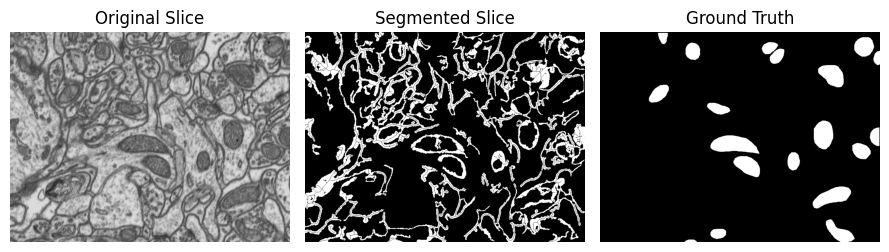

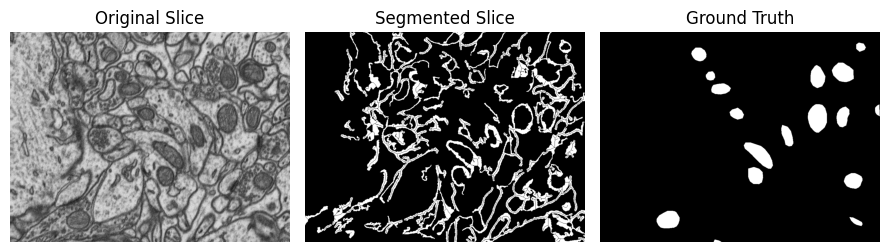

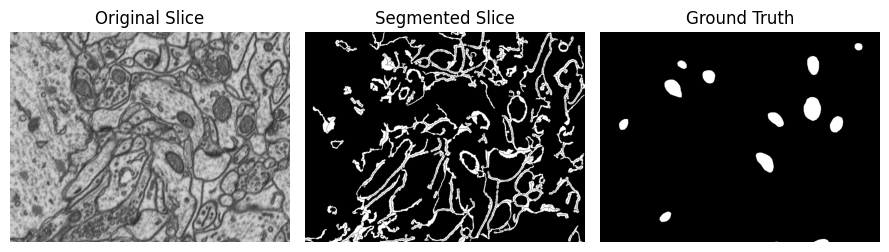

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize a single slice alongside segmented result and ground truth
def compare_slices(slice_index, original_data, segmented_data, ground_truth):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))

    axes[0].imshow(original_data[slice_index, :, :], cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Original Slice')

    axes[1].imshow(segmented_data[slice_index, :, :], cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Segmented Slice')

    axes[2].imshow(ground_truth[slice_index, :, :], cmap='gray')
    axes[2].axis('off')
    axes[2].set_title('Ground Truth')

    plt.tight_layout()
    plt.show()

# Let's pick some slices and visualize them
slice_indices = [15, 66, 100]  # You can change these indices to view other slices

for idx in slice_indices:
    compare_slices(idx, train_data, train_data_segmented_cleaned, train_groundtruth)


In [ ]:
import numpy as np

def calculate_iou(prediction, ground_truth):
    """
    Calculate Intersection over Union (IoU) for binary segmentation.

    Args:
    - prediction (numpy array): Binary mask of the prediction.
    - ground_truth (numpy array): Binary mask of the ground truth.

    Returns:
    - float: IoU score.
    """
    intersection = np.logical_and(prediction, ground_truth)
    union = np.logical_or(prediction, ground_truth)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score


In [ ]:
# Now, you can compare the post-processed results with the ground truth as you did earlier
train_iou_cleaned = calculate_iou(train_data_segmented_cleaned, train_groundtruth)
test_iou_cleaned = calculate_iou(test_data_segmented_cleaned, test_groundtruth)

print("IoU Score:", train_iou_cleaned, test_iou_cleaned )


IoU Score: 0.08536997405709715 0.07797427252891105


In [ ]:
import os
import numpy as np
import tifffile as tiff
from skimage.transform import resize

In [ ]:


directory = '/content/drive/MyDrive/CV_Project/tif/'

# Load the files
train_data = tiff.imread(os.path.join(directory, 'training.tif'))
train_groundtruth = tiff.imread(os.path.join(directory, 'training_groundtruth.tif'))
test_data = tiff.imread(os.path.join(directory, 'testing.tif'))
test_groundtruth = tiff.imread(os.path.join(directory, 'testing_groundtruth.tif'))

# Resize function
def resize_data(data):
    resized_data = np.zeros((165, 128, 128), dtype=np.uint8)
    for i in range(165):
        resized_data[i] = resize(data[i], (128, 128), preserve_range=True).astype(np.uint8)
    return resized_data

# Resize the data
train_data_resized = resize_data(train_data)
train_groundtruth_resized = resize_data(train_groundtruth)
test_data_resized = resize_data(test_data)
test_groundtruth_resized = resize_data(test_groundtruth)



In [ ]:
# Create directories to store resized images
resized_train_data_dir = os.path.join(directory, 'resized_training')
resized_train_gt_dir = os.path.join(directory, 'resized_training_groundtruth')
resized_test_data_dir = os.path.join(directory, 'resized_testing')
resized_test_gt_dir = os.path.join(directory, 'resized_testing_groundtruth')

os.makedirs(resized_train_data_dir, exist_ok=True)
os.makedirs(resized_train_gt_dir, exist_ok=True)
os.makedirs(resized_test_data_dir, exist_ok=True)
os.makedirs(resized_test_gt_dir, exist_ok=True)

# Save the resized data
for i in range(165):
    tiff.imsave(os.path.join(resized_train_data_dir, f'train_{i}.tif'), train_data_resized[i])
    tiff.imsave(os.path.join(resized_train_gt_dir, f'train_gt_{i}.tif'), train_groundtruth_resized[i])
    tiff.imsave(os.path.join(resized_test_data_dir, f'test_{i}.tif'), test_data_resized[i])
    tiff.imsave(os.path.join(resized_test_gt_dir, f'test_gt_{i}.tif'), test_groundtruth_resized[i])


<ipython-input-4-c1031e233a5f>:14: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(os.path.join(resized_train_data_dir, f'train_{i}.tif'), train_data_resized[i])
<ipython-input-4-c1031e233a5f>:15: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(os.path.join(resized_train_gt_dir, f'train_gt_{i}.tif'), train_groundtruth_resized[i])
<ipython-input-4-c1031e233a5f>:16: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(os.path.join(resized_test_data_dir, f'test_{i}.tif'), test_data_resized[i])
<ipython-input-4-c1031e233a5f>:17: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(os.path.join(resized_test_gt_dir, f'test_gt_{i}.tif'), test_groundtruth_resized[i])


**LOAD THE RESIZED DATA HERE**

In [ ]:
# Load resized images from folders
def load_resized_data(data_dir, filename):
    data = np.zeros((165, 128, 128), dtype=np.uint8)
    for i in range(165):
        data[i] = tiff.imread(os.path.join(data_dir, f'{os.path.basename(filename)}_{i}.tif'))
    return data

print(directory)

resized_train_data = load_resized_data(directory + "reTrain", "train")
resized_train_groundtruth = load_resized_data(directory + "reTrainGT", "train_gt" )
resized_test_data = load_resized_data(directory + "reTest", "test")
resized_test_groundtruth = load_resized_data(directory + "reTestGT", "test_gt")


/content/drive/MyDrive/CV_Project/tif/


In [ ]:
print(resized_train_data.shape)

In [ ]:

# Reshape data to add the channel dimension
train_data = resized_train_data.reshape(165, 128, 128, 1)  # Add channel dimension
train_groundtruth = resized_train_groundtruth.reshape(165, 128, 128, 1)  # Add channel dimension
test_data = resized_test_data.reshape(165, 128, 128, 1)  # Add channel dimension
test_groundtruth = resized_test_groundtruth.reshape(165, 128, 128, 1)  # Add channel dimension

# Normalize data to the range [0, 1]
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
import keras.backend as K

# Dice Coefficient
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

# Intersection over Union
def iou(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3]) - intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

# F1 score (also known as Dice in the context of image segmentation)
def f1_score(y_true, y_pred):
    return dice_coef(y_true, y_pred)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Define U-Net model
def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)

    # Contracting path
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottom of the U
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)

    # Expanding path
    u1 = UpSampling2D((2, 2))(c4)
    m1 = concatenate([u1, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(m1)

    u2 = UpSampling2D((2, 2))(c5)
    m2 = concatenate([u2, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(m2)

    u3 = UpSampling2D((2, 2))(c6)
    m3 = concatenate([u3, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(m3)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    return Model(inputs=inputs, outputs=outputs)

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', dice_coef, iou, f1_score])


In [ ]:
history = model.fit(train_data, train_groundtruth, epochs=15, validation_data=(test_data, test_groundtruth), batch_size=8)


In [ ]:
model.save(directory + "tifUNET.hdf5")

In [ ]:
plt.figure(figsize=(20,5))

# Accuracy
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Dice Coefficient
plt.subplot(1, 4, 2)
plt.plot(history.history['dice_coef'], label='Training Dice Coef')
plt.plot(history.history['val_dice_coef'], label='Validation Dice Coef')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.legend()

# Intersection over Union (IoU)
plt.subplot(1, 4, 3)
plt.plot(history.history['iou'], label='Training IoU')
plt.plot(history.history['val_iou'], label='Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()

# F1 Score
plt.subplot(1, 4, 4)
plt.plot(history.history['f1_score'], label='Training F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()
